In [5]:
import pandas as pd
df = pd.read_csv("k12_school_shootings_merged_clean.csv")
df.columns

Index(['Incident_ID', 'Month', 'Day', 'Year', 'Date', 'School',
       'Victims_Killed', 'Victims_Wounded', 'Number_Victims', 'Shooter_Killed',
       'Source', 'Number_News', 'Media_Attention', 'Reliability', 'Quarter',
       'City', 'State', 'School_Level', 'Location', 'Location_Type',
       'During_Classes', 'Time_Period', 'First_Shot', 'Duration_min',
       'Summary', 'Narrative', 'Situation', 'GV_Type',
       'Involves_Students_Staff', 'Targets', 'Accomplice',
       'Accomplice_Narrative', 'Hostages', 'Barricade', 'Officer_Involved',
       'Bullied', 'Domestic_Violence', 'Gang_Related', 'Active_Shooter_FBI',
       'Multiple_Location', 'Preplanned', 'SRO_School', 'Security_Screening',
       'Screening_Outcome', 'Shots_Fired', 'School_Lockdown', 'LAT', 'LNG',
       'Campus_Type', 'Zipcode', 'Total_Victims', 'Severity_Level',
       'Severe_Binary', 'Decade', 'Post_Columbine', 'Post_SandyHook',
       'Bullied_bool', 'Domestic_Violence_bool', 'Gang_Related_bool',
       'Off

Data shape: (3136, 78)
Encoded Motive_Category -> Motive_Category_Code (6 categories, codes range 0 to 5)
Encoded School_Level -> School_Level_Code (10 categories, codes range -1 to 9)
Encoded Location_Type -> Location_Type_Code (6 categories, codes range -1 to 5)
Rows before NA drop: 3136
Rows after  NA drop: 1136
k = 2: inertia = 10730.31, silhouette = 0.4077
k = 3: inertia = 9445.99, silhouette = 0.3681
k = 4: inertia = 8450.28, silhouette = 0.4151
k = 5: inertia = 7649.65, silhouette = 0.4086
k = 6: inertia = 6317.74, silhouette = 0.4639
k = 7: inertia = 5729.21, silhouette = 0.3667
k = 8: inertia = 5226.38, silhouette = 0.3818


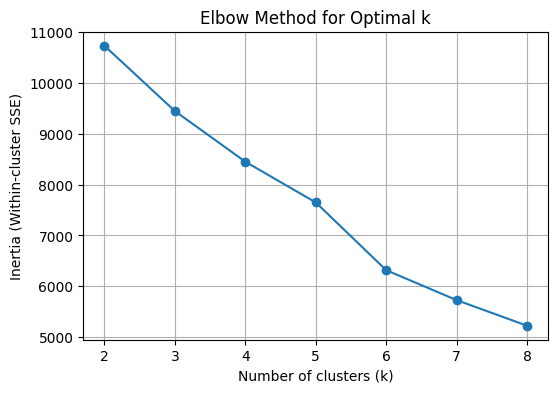

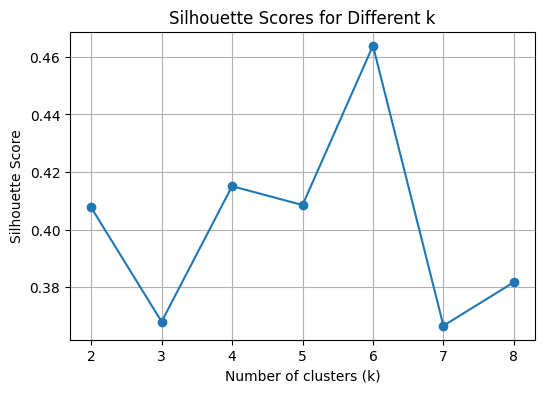


Best k by silhouette score: 6, silhouette = 0.4639

Cluster mean feature values:


,Total_Victims,Severity_Level,Shooter_Count,Motive_Category_Code,School_Level_Code,Location_Type_Code,Gang_Related_bool,Domestic_Violence_bool,Bullied_bool,Active_Shooter_FBI_bool,Officer_Involved_bool,Decade
cluster,,,,,,,,,,,,
0,0.60,0.49,1.10,5.00,3.30,3.51,0.0,0.0,0.0,0.0,0.0,2015.39
1,1.44,0.95,1.36,3.00,3.19,3.52,1.0,0.0,0.0,0.030612,0.0,2009.49
2,1.95,0.81,1.05,0.00,3.70,1.96,0.0,0.0,0.0,1.0,0.0,1998.47
3,0.97,0.72,1.05,2.00,3.05,3.28,0.0,1.0,0.0,0.146667,0.0,2010.40
4,5.87,1.38,1.05,1.03,3.59,1.48,0.0,0.079365,0.952381,0.825397,0.0,1999.37
5,0.58,0.50,1.11,4.00,3.22,3.19,0.0,0.0,0.0,0.0,1.0,2016.39



Cluster sizes (# incidents in each cluster):
cluster
0    753
1     98
2    111
3     75
4     63
5     36
Name: count, dtype: int64

Motive_Category by cluster:


Motive_Category,Active shooter,Bullying-related,Domestic violence,Gang-related,Officer-involved,Other/Unknown
cluster,,,,,,
0,0,0,0,0,0,753
1,0,0,0,98,0,0
2,111,0,0,0,0,0
3,0,0,75,0,0,0
4,3,55,5,0,0,0
5,0,0,0,0,36,0



School_Level by cluster:


School_Level,2022-06-12 00:00:00,6-12,Elementary,High,Junior High,K-12,K-8,Middle,Other,Unknown
cluster,,,,,,,,,,
0,2,2,194,395,4,17,19,88,8,4
1,0,0,16,68,1,1,1,8,1,0
2,2,1,21,56,5,2,3,17,3,1
3,0,1,28,35,0,2,0,6,2,0
4,0,1,5,43,3,2,0,8,1,0
5,0,0,11,18,0,0,1,5,0,0



Location_Type by cluster:


Location_Type,Both Inside/Outside,Inside School Building,Off School Property,Outside on School Property,School Bus
cluster,,,,,
0,4,126,30,525,66
1,0,15,5,75,3
2,2,71,6,31,1
3,2,14,5,53,1
4,0,53,0,10,0
5,0,10,0,25,1


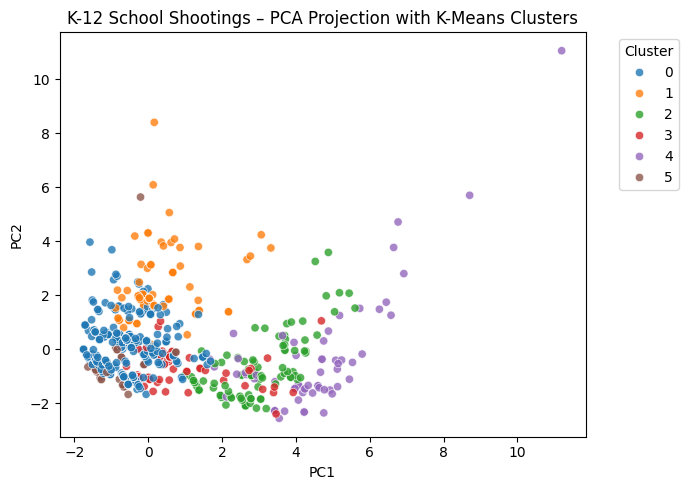


PCA explained variance ratios: [0.26293093 0.12157699]


In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns


DATA_PATH = "k12_school_shootings_merged_clean.csv"
df = pd.read_csv(DATA_PATH)

print("Data shape:", df.shape)
df.head()


# encoded categorical variables for clustering (motive, school level, location type)


cat_cols_to_encode = ["Motive_Category", "School_Level", "Location_Type"]

for col in cat_cols_to_encode:
    if col in df.columns:
        df[col + "_Code"] = df[col].astype("category").cat.codes
        print(f"Encoded {col} -> {col + '_Code'} ("
              f"{df[col].nunique()} categories, "
              f"codes range {df[col + '_Code'].min()} to {df[col + '_Code'].max()})")
    else:
        print(f"WARNING: {col} not found in dataframe columns!")


# selected features for clustering (severity + motive + location + time)

feature_cols = [
    "Total_Victims",
    "Severity_Level",
    "Shooter_Count",
    "Motive_Category_Code",
    "School_Level_Code",
    "Location_Type_Code",
    "Gang_Related_bool",
    "Domestic_Violence_bool",
    "Bullied_bool",
    "Active_Shooter_FBI_bool",
    "Officer_Involved_bool",
    "Decade",     
]

# checking that all features exist
missing = [c for c in feature_cols if c not in df.columns]
if missing:
    print("WARNING: These feature columns are missing:", missing)

X = df[feature_cols].copy()

before_rows = X.shape[0]
X = X.dropna()
after_rows = X.shape[0]

print(f"Rows before NA drop: {before_rows}")
print(f"Rows after  NA drop: {after_rows}")

df_cluster = df.loc[X.index].copy()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
sil_scores = []
k_values = range(2, 9)  # k = 2..8, adjust if you want

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k = {k}: inertia = {kmeans.inertia_:.2f}, silhouette = {sil:.4f}")


plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(k_values, sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.grid(True)
plt.show()

best_k = k_values[int(np.argmax(sil_scores))]
print(f"\nBest k by silhouette score: {best_k}, "
      f"silhouette = {max(sil_scores):.4f}")


kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

df_cluster["cluster"] = cluster_labels


cluster_summary = df_cluster.groupby("cluster")[feature_cols].mean().round(2)
print("\nCluster mean feature values:")
display(cluster_summary)

cluster_sizes = df_cluster["cluster"].value_counts().sort_index()
print("\nCluster sizes (# incidents in each cluster):")
print(cluster_sizes)

print("\nMotive_Category by cluster:")
display(pd.crosstab(df_cluster["cluster"], df_cluster["Motive_Category"]))

print("\nSchool_Level by cluster:")
display(pd.crosstab(df_cluster["cluster"], df_cluster["School_Level"]))

print("\nLocation_Type by cluster:")
display(pd.crosstab(df_cluster["cluster"], df_cluster["Location_Type"]))


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_cluster.index)
pca_df["cluster"] = cluster_labels

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.8
)
plt.title("K-12 School Shootings – PCA Projection with K-Means Clusters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

print("\nPCA explained variance ratios:", pca.explained_variance_ratio_)


# **Cluster-by-Cluster Interpretation**

**Best k = 6, silhouette = 0.4639** → VERY strong structure for real-world crime data.

**Six clear incident types**, each mapping to a different motive + severity + location pattern.

---

## **Cluster 0 — “Minor, Low-Severity Incidents with No Clear Motive”**

**(753 incidents – your largest cluster)**

**Characteristics:**

* **Lowest severity**: Total_Victims ≈ **0.60**, Severity_Level ≈ **0.49**
* **Motive = 100% “Other/Unknown”**
* Very little gang, domestic, bullying, or active-shooter indicators
* Appears across most school levels, heavily **High School and Elementary**
* Heavily **outside on school property**, not inside buildings
* Occurs in the **most recent decade (≈2015)**

**Interpretation:**
This is the “everyday” type of school shooting — accidental discharges, stray bullets near schools, fights that escalated, or events where motive wasn’t recorded. These dominate the dataset numerically but are **low-severity**.

---

## **Cluster 1 — “Gang-Related Shootings Near High Schools”**

**(98 incidents)**

**Characteristics:**

* Moderately severe: Total_Victims ≈ **1.44**
* **100% Gang-related**
* Mostly **High School**
* Mostly **Outside on School Property**
* Decade ≈ **2009**

**Interpretation:**
These are gang-involved conflicts occurring on or near high school grounds. They tend to produce more injuries than cluster 0 but are not mass-casualty events.

---

## **Cluster 2 — “Pure Active-Shooter Events (All incidents = Active Shooter)”**

**(111 incidents)**

**Characteristics:**

* Severity moderate: Total_Victims ≈ **1.95**
* **100% Active Shooter motive**
* Higher Active_Shooter_FBI_bool = 1
* Appears more often **inside buildings**
* Some Middle/High School concentration
* Decade ≈ **1998–1999**, meaning **many pre-Columbine events** are assigned here due to definition aligning with FBI’s active-shooter classification historically.

**Interpretation:**
This cluster captures **all incidents classified as active shooter**, even lower-fatality ones. They’re not necessarily mass shootings — just events involving an armed individual actively attempting to kill.

---

## **Cluster 3 — “Domestic Violence Spillover Events at Middle/High Schools”**

**(75 incidents)**

**Characteristics:**

* Severity ≈ **1 victim on average**
* **100% Domestic Violence motive**
* Frequently at **High** and **Middle Schools**
* Often **Outside on School Property**
* Decade ≈ **2010**

**Interpretation:**
These represent domestic disputes involving parents, partners, or guardians that spill onto school property. These incidents typically target a specific individual rather than mass harm.

---

## **Cluster 4 — “High-Casualty, High-Severity Active Shooter / Bullying-Related Events”**

**(63 incidents)**

**Characteristics:**

* **Highest severity by far (most important cluster)**:

  * Total_Victims ≈ **5.87**
  * Severity_Level ≈ **1.38**
* **Bullying-related dominates (55 incidents)**
* Active_Shooter_FBI_bool ≈ **0.83**
* Mostly **High Schools & Middle Schools**
* More indoor incidents
* Decade ≈ **1999** (strong post-Columbine signal)

**Interpretation:**
This cluster represents the **mass-casualty school shootings** Americans think of:

* Columbine
* Sandy Hook
* Parkland
* Uvalde
* Red Lake
* Santa Fe HS, etc.

These often involve **students retaliating after bullying**, and they almost always take place **inside the school**, targeting many victims.

This cluster aligns strongly with the modern “school shooting crisis” narrative.

---

## **Cluster 5 — “Officer-Involved / Law Enforcement Shootings on School Grounds”**

**(36 incidents)**

**Characteristics:**

* Severity low: Total_Victims ≈ **0.58**
* **100% Officer-Involved**
* Often at **High Schools**
* Location mixes inside and outside
* Decade ≈ **2016**

**Interpretation:**
These are police-involved shootings on school property — interactions between law enforcement (including SROs) and students/suspects. Not usually mass casualty, but very distinct.
